In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve



In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
data.shape
data.info()
data.describe()
data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:

 data.isnull().sum().max()

np.int64(0)

In [8]:
data.dropna(inplace=True)
duplicates = data.duplicated().sum()
print(f'Duplicate rows: {duplicates}')
data.drop_duplicates(inplace=True)

Duplicate rows: 1081


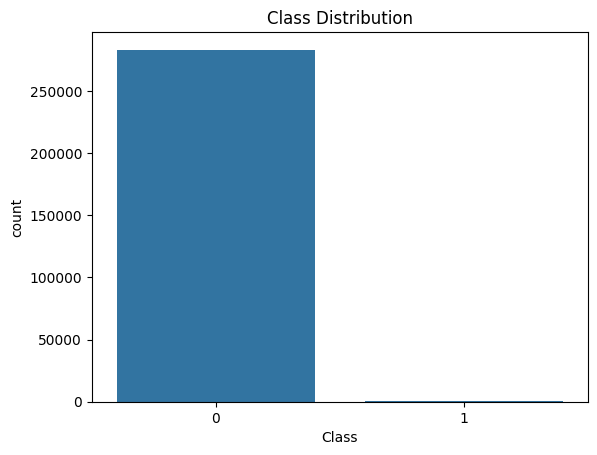

Class
0    283253
1       473
Name: count, dtype: int64
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


In [9]:
sns.countplot(x='Class', data=data)
plt.title("Class Distribution")
plt.show()

print(data['Class'].value_counts())
print(data['Class'].value_counts(normalize=True) * 100)


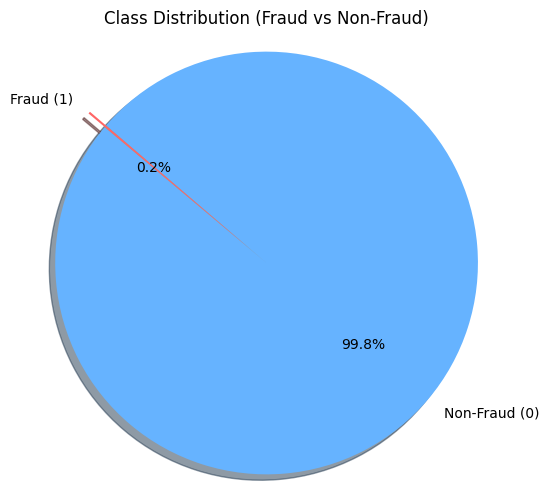

In [10]:
labels = ['Non-Fraud (0)', 'Fraud (1)']
sizes = data['Class'].value_counts()
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)  

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.axis('equal')  
plt.show()


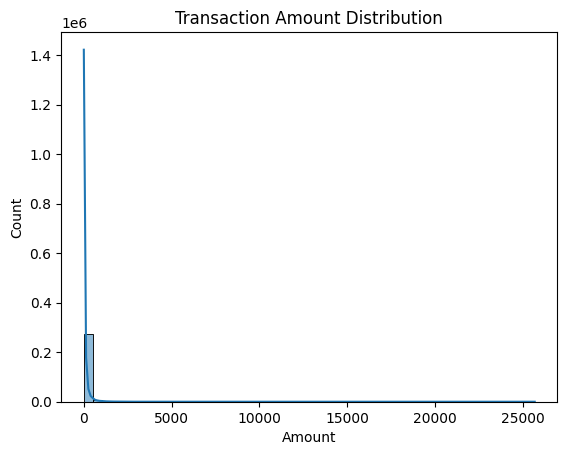

In [11]:
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()




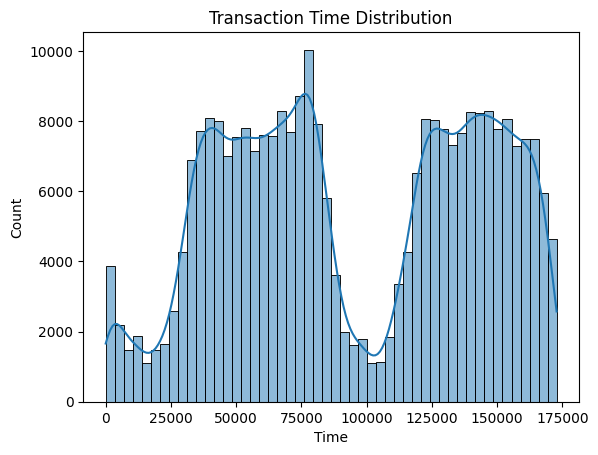

In [10]:
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

<Axes: xlabel='V1', ylabel='Density'>

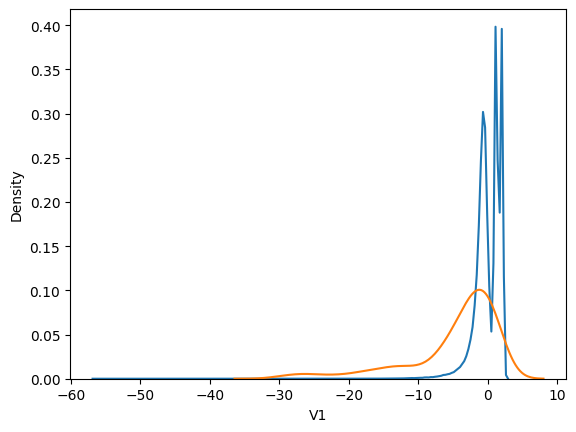

In [15]:

 sns.kdeplot(data=data[data['Class'] == 0], x='V1', label='Non-Fraud')
 sns.kdeplot(data=data[data['Class'] == 1], x='V1', label='Fraud')


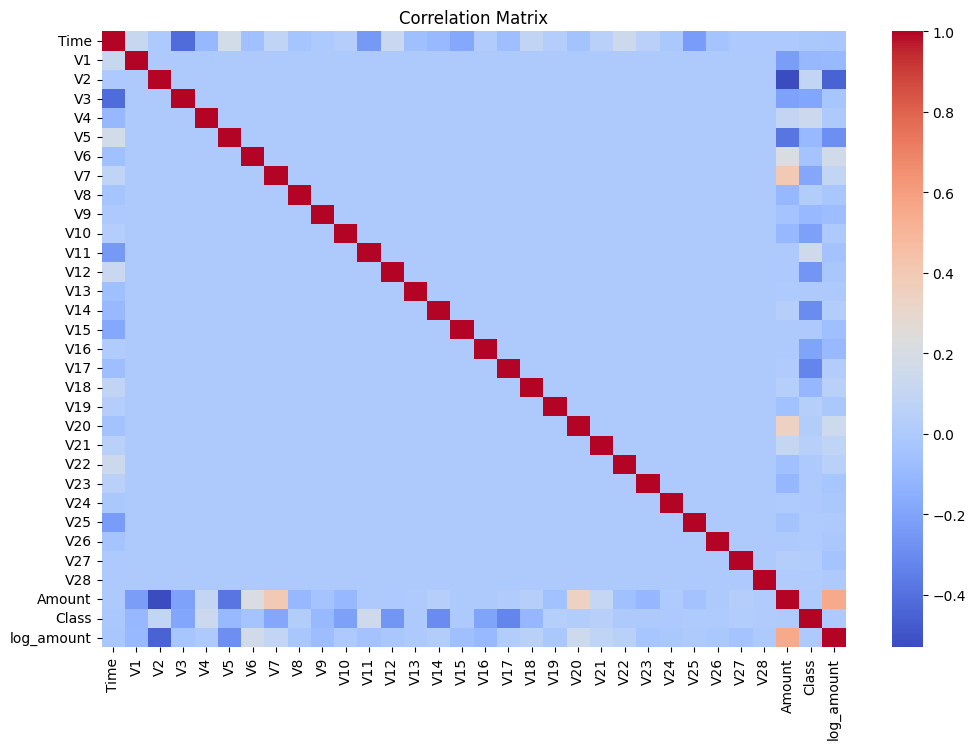

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [16]:
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

In [18]:
pca = PCA(n_components=10) 
X_pca = pca.fit_transform(X_scaled)


print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.39155957 0.10979763 0.05862254 0.05508854 0.040957   0.03861121
 0.03794885 0.03205467 0.02904236 0.02813316]


In [19]:
iso_forest = IsolationForest(contamination=0.01, random_state=42)

outliers = iso_forest.fit_predict(X_scaled)

inlier_mask = outliers != -1
X_filtered = X_scaled[inlier_mask]
y_filtered = y_resampled[inlier_mask]

print(f"Original dataset size: {X_scaled.shape[0]}")
print(f"Filtered dataset size: {X_filtered.shape[0]}")


Original dataset size: 566506
Filtered dataset size: 560840


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3, random_state=42)


In [21]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85205
           1       0.99      0.97      0.98     83930

    accuracy                           0.98    169135
   macro avg       0.98      0.98      0.98    169135
weighted avg       0.98      0.98      0.98    169135



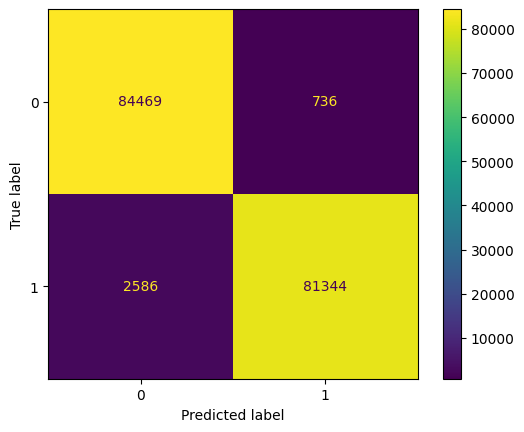

In [24]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


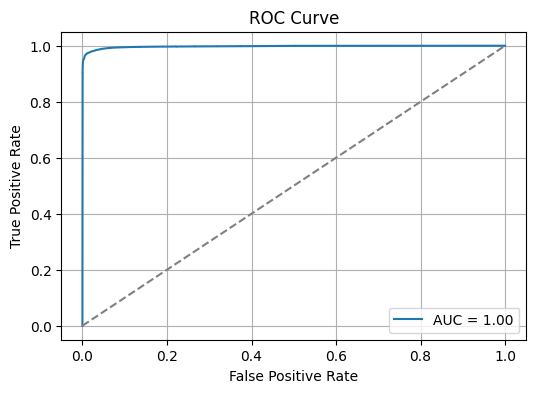

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc_score(y_test, y_scores)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


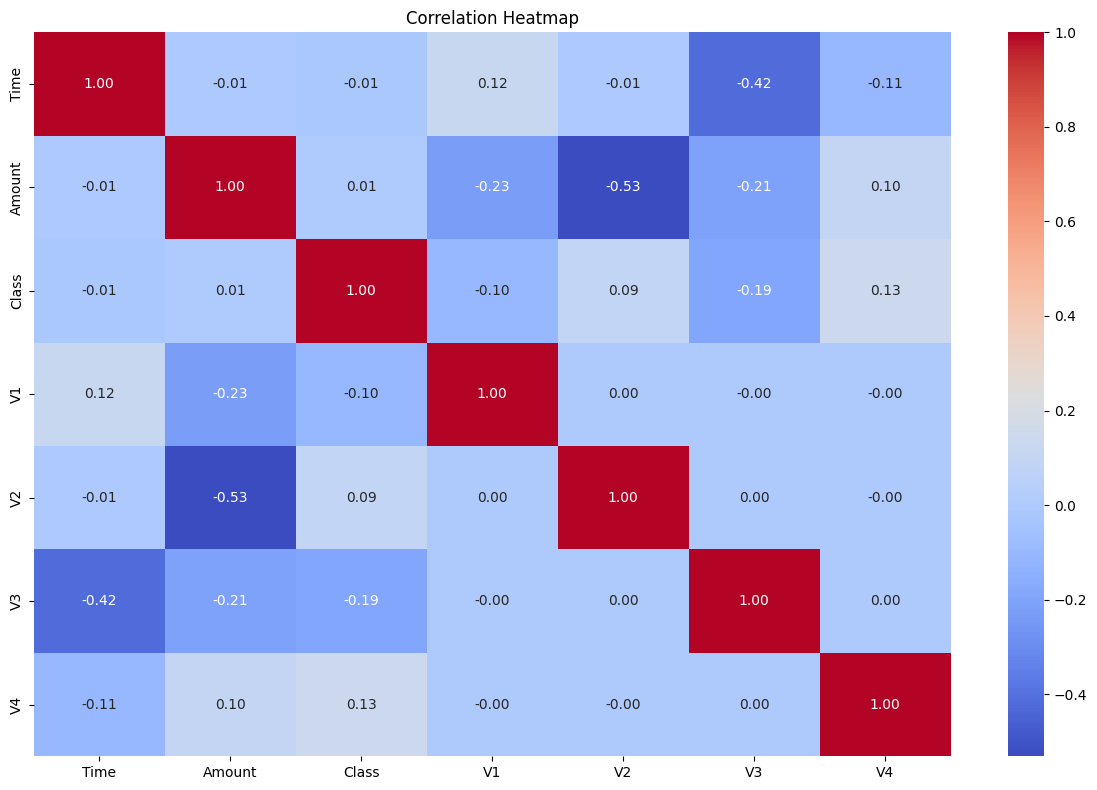

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for selected features
plt.figure(figsize=(12, 8))
corr = data[['Time', 'Amount', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


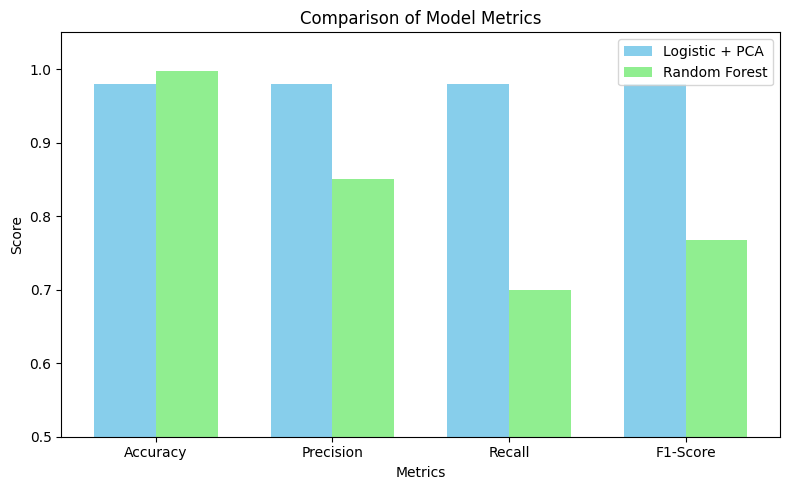

In [12]:
import numpy as np

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
logistic = [0.98, 0.98, 0.98, 0.98]
random_forest = [0.9973, 0.85, 0.70, 0.7674]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, logistic, width, label='Logistic + PCA', color='skyblue')
plt.bar(x + width/2, random_forest, width, label='Random Forest', color='lightgreen')

plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Model Metrics")
plt.xticks(x, metrics)
plt.ylim(0.5, 1.05)
plt.legend()
plt.tight_layout()
plt.show()
